# Indekseringsoppgaven

**Generelle regler for indeksering i Python:**
- Når man angir indekser i Python bruker man brakkeparanteser []. 
- Indekser MÅ være integers - altså det kan ikke være noen desimaler, og det holder ikke at desimalen er 0. 
- Python starter indekseringen sin på 0. 
- Den siste indeksen er -1. Den nest siste er -2 etc. 
- Skal man ha alle indekser i en rad eller kolonne bruker man kolon.
- I en matrise med to dimensjoner er den første indeksen alltid **r**adene, mens den andre indeksen er **k**olonnene. Tenk f.eks. "**R**ace **C**ar", altså "**R**ow **C**olumn"
- Skal man ha tak i mer enn en, men ikke alle, elementene skriver man [a:b]. Dette betyr element a til *men ikke med* b. 
- Hvis man har en matrise og skal ha tak i rad a til men ikke med b, og alle kolonnene skriver man  [a:b,:]. Rader og kolonner skilles altså med komma. 
- Vil man ha fra start frem til (og ikke med) en indeks skriver man [:a]. Vil man ha fra (og med) en indeks til slutten skriver man [a:]. 

Vi bruker datasettet over årlig temperatur i Bergen til å gå gjennom disse punktene. 

#### Last inn pakkene som trengs

In [3]:
import numpy as np
import matplotlib.pyplot as plt # for figurer
import requests
import io
from EkteDataFunk import loadData # for filinnlasting


#### 1. Last inn et datasett

Last inn datasettet "TempBergenYearlyNonan.txt". I oppgaven "RyddDatasett" og "Funksjoner" er det detaljer på hvordan filinnlastingen fungerer (se https://github.com/irendundas/EkteData). 

In [7]:
file='TempBergenYearlyNonan.txt'
data = loadData(file, rydd='N')
print(data.shape)  # Dette gir dimensjonene til datasettet. Man må skrive 
                   # "print()" rundt fordi bare den siste linjen i en celle 
                   # printes ut automatisk
data   # Dette printer ut alle verdiene i "data"

(160, 2)


array([[1861.        ,    8.33636364],
       [1862.        ,    7.71666667],
       [1863.        ,    7.75833333],
       [1864.        ,    6.86666667],
       [1865.        ,    7.225     ],
       [1866.        ,    7.41666667],
       [1867.        ,    6.55      ],
       [1868.        ,    7.975     ],
       [1869.        ,    6.45      ],
       [1870.        ,    6.575     ],
       [1871.        ,    7.64545455],
       [1872.        ,    8.275     ],
       [1873.        ,    7.83333333],
       [1874.        ,    7.175     ],
       [1875.        ,    7.01666667],
       [1876.        ,    6.78333333],
       [1877.        ,    6.55      ],
       [1878.        ,    7.06666667],
       [1879.        ,    6.69166667],
       [1880.        ,    7.53333333],
       [1881.        ,    6.36666667],
       [1882.        ,    7.9       ],
       [1883.        ,    7.6       ],
       [1884.        ,    8.20833333],
       [1885.        ,    6.70833333],
       [1886.        ,   

Outputet av `data.shape` er (160, 2). Det betyr at "data" er en matrise med 160 rader og 2 kolonner. "data" har altså to dimensjoner.

#### 2. Lag en figur av dataene
Dette er lurt for å visualisere hva du faktisk jobber med.
Linjen under plotter alle dataene i kolone 2 av vektoren "data" (y-aksen) som
en funksjon av indeks-nummer (x-aksen). 
":" betyr "alle radene", "1" betyr "kolonne med indeks 1", altså kolonne nr 2

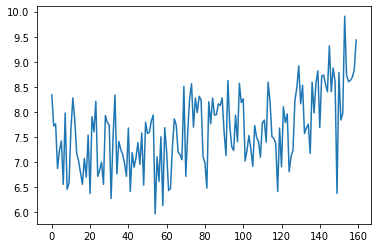

In [3]:
plt.plot(data[:,1])

plt.show() # Denne linjen gjør bare at en tekst-linje man ikke trenger ikke 
           # blir printet ut. Prøv selv å kjøre denne cellen uten denne linjen 
           # (kommenter den ut med "#") om du vil.

#### 3. Lagre dataene til variabler

`data.shape` viste oss at datasettet over temperatur har 160 rader og 2 kolonner. Hvis vi vil ha tak i alle årene og lagre dem i en vektor som vi kaller "tid" skriver vi `tid=data[:,0]`, altså *alle radene* (:), men kun den *første kolonnen* (0)


In [33]:
tid=data[:,0]
tid

array([1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869.,
       1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878.,
       1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887.,
       1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896.,
       1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905.,
       1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914.,
       1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923.,
       1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988.,

#### Oppgave 1.
Lag en variabel "temp" som inneholder den andre kolonnen med temperatur.

#### 4. Se på en utvalgt del av datasettet

Her har vi 160 år med data. Det er ikke alltid man vil studere alle årene på en gang. Kanskje har vi en mistanke om at at skjedde noe veldig spennende mellom 1873 - 1947? Da kan vi plukke ut de radene som tilsvarer disse årene og kun plotte disse. For å plukke ut de rette radene må vi finne indeksen til 1873 og 1947 i vektoren "tid". Det finnes alltid mange måter å gjøre slikt på, og vi skal se på to forskjellige måter. 

**Metode 1:** 
Denne er kanskje mest intuitiv, men ikke så effektiv, og heller ikke så robust i kompliserte koder

Finn indeksen til 1873 og 1947 i vektoren "tid". Siden tidssteget i "tid" er i hele år kan man finne differensen mellom det året man er ute etter og startåret i vektoren. Dette gir antall år i mellom, som da tilsvarer indeksen til året du er ute etter. 


In [34]:
idt1=1873-tid[0] # tanken bak navnet "idt1" er "id=index", "t=tid", "1=start"
idt2=1947-tid[0]
idt1, idt2

(12.0, 86.0)

tid1 er 12 og tid2 er 86. Da skal bli `tid[12]=tid[idt1]=1873` og `tid[86]=tid[idt2]=1847`. Vi prøver:

In [35]:
tid[idt1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Dette gir en feilmelding. Problemet er at `tid1=12.0` som er en *float-verdi*, mens indekser kun kan være "integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays". En *float-verdi* har desimaler, mens *integer-verdier* er heltall. Hvis vi konverterer *tid1* fra *float* til *integer* løser vi altså problemet. Dette gjør vi med den innebygde kommandoen `int`.

In [36]:
idt1=int(idt1)
idt2=int(idt2)
idt1, idt2

(12, 86)

Nå kan vi bruke indeksene tid1 og tid2:

In [37]:
tid[idt1], tid[idt2]

(1873.0, 1947.0)

Men husk at indeksering `[x:y]` **ikke** inkluderer y. Så for å dekke alle indeksene "fra tid1 til *og med* tid2" må man skrive `[idt1:idt2+1]` 

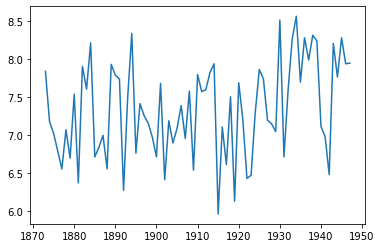

In [38]:
plt.plot(tid[idt1:idt2+1], temp[idt1:idt2+1])
plt.show()

**Metode 2:**
Denne metoden er mer effektiv og veldig anvennelig i store datasett, og robust i kompliserte koder. 

Men vi må introdusere en ny funksjon: *np.where*. 

Denne funksjonen lar deg finne verdier som oppfyller et kriterie, for eksempel at tid skal være 1873 eller større. Eller 1947 eller mindre. Alle verdier i *tid* som oppfyller begge disse kriteriene er de indeksene vi vil ha.

In [39]:
idt=np.where((tid>=1873) & (tid<=1947))
idt

(array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
        63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86], dtype=int64),)

Disse indeksene kan vi så mate tilbake til *tid*. 

In [40]:
tid[idt]

array([1873., 1874., 1875., 1876., 1877., 1878., 1879., 1880., 1881.,
       1882., 1883., 1884., 1885., 1886., 1887., 1888., 1889., 1890.,
       1891., 1892., 1893., 1894., 1895., 1896., 1897., 1898., 1899.,
       1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
       1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
       1945., 1946., 1947.])

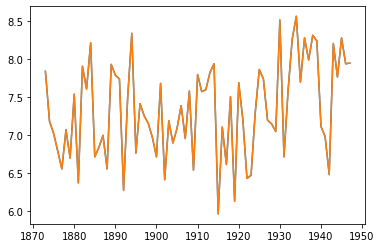

In [42]:
# Indeksering basert på Metode 1
plt.plot(tid[idt1:idt2+1], temp[idt1:idt2+1])

# Indeksering basert på Metode 2
plt.plot(tid[idt], temp[idt])
plt.show()

# Det er kun en linje her, selv om vi har plottet to. Det er fordi outputtet av
# begge indekseringsmetodene er det samme

#### Oppgave 2.
Skriv ut årene og temperatur for alle årene fra året du ble født frem til 2016. Bruk både metode 1 og 2. 

In [ ]:
# Metode 1


In [ ]:
# Metode 2:


#### Oppgave 3. 
Skriv ut årene og temperatur for alle årene fra året du ble født frem til og med slutten av datasettet. Bruk den metoden du vil, men pass på at det siste året blir med. 

#### Oppgave 4. 
Finn de fem siste årene i datasettet.

#### Oppgave 5. 
Finn tidsserien for temperatur på hele 1900-tallet. Skriv også ut årene. 

#### 5. Velg ut datapunkt med et jevnt intervall

Iblant trenger man å hente ut data med jevne intervall - f.eks. hvis man har et datasett med daglig oppløsning og bare vil ha tak i onsdagene, eller man bare vil ha tak i bursdagen sin fra en tidsserie med daglig oppløsning som spenner over flere år. Eller kanskje man vil hente ut data fra kl 12 for å sjekke solstyrke midt på dagen... 

Med indeksering kan man bruke to eller tre verdier. Bruker man to angir man kun start og stop: `[start:stop]`. Bruker man tre angir man også intervallet av verdier man er interessert i: `[start:stop:step]`. Skal man f.eks. ha annenhver verdi mellom indeks a og b skriver man [a:b:2]. Husk at det fremdeles er a *til og ikke med* b. 

#### Oppgave 6. 
Finn temperaturen for hvert tiende år fra starten til slutten av tidsserien. Skriv ut årene i tillegg (for å sjekke at indekseringen du har satt stemmer).

array([1861., 1871., 1881., 1891., 1901., 1911., 1921., 1931., 1941.,
       1951., 1961., 1971., 1981., 1991., 2001., 2011.])

#### Oppgave 7. 
Finn temperaturen for hvert tiende år siden 1870 frem til 2016. Skriv igjen ut årene i tillegg (for å sjekke at indekseringen du har satt stemmer).

Her kan du igjen benytte Metode 1 eller 2 for å finne årene mellom 1870 og 2020. Du kan enten finne indeksen til 1870 og indeksen il 2016 separat og så printe ut hvert tiende år/hver tiende temperatur mellom disse indeksene, ELLER, du kan finne indeksen til alle år mellom 1870 og 2016 og plugge hver tidende av disse indeksene inn i "tid". 

Du kan komme til å støte på dette problemet: du får en output av idt som er `idt=(array([9, 10, 11, ...]))`. For å velge bestemte indekser av dette outputtet må den ytterste parantesen vekk. For å få til dette skriver man `idt=idt[0]`. Da går man "et nivå ned" i "itd" og unngår den ytterste parantesen. Du kan nå indeksere idt. 

*Et notat til cellen over: man trenger ikke alltid lage variabler for alt. Man trenger for eksempel ikke "omdøpe" `idt[0]` til `idt`, man kan bruke `idt[0]` direkte. Har du for eksempel en vektor med indekser via Metode 2, men vil bare ha annenhver verdi kan du skrive `tid[idt[0][0::2]]`. Dette er det samme som `tid[idt[0][0:-1:2]]`. `idt[0]` gjør at du unngår den ytterste parantesen du får når du bruker np.where. `idt[0][0::2]` gjør at at du unngår den første parantesen, og velger ut annenhver indeks fra start til slutt. `tid[idt[0][0::2]]` gjør at du ikke bare får indeksene men de faktiske tids-verdiene. Ved å skrive alt dette i en linje slipper man mange mellomvariabler, som kan gjøre koden ryddig og oversiktlig. Det finnes selvfølgelig en grense - blir koden FOR kompakt og linjene FOR lange blir det fort uoversiktlig. Men dette er litt smak og behag, og så lenge man kommenterer godt i koden sin og forklarer hva som skjer blir det meste bra.*

#### Oppgave 8. 
Lag en figur som viser hele temperaturtidsserien, men plot også hvert tiende år på samme figur. Synes du tidsserien blir godt representert ved å bare se på hvert tiende år? I en seinere oppgave, f.eks. den om for-løkker (Del 5), ser vi på hvordan man kan representere datasettet ved å ta gjennomsnittet over tiårsperioder. Hvordan tror du denne tidsserien representerer datasettet i forhold til den figuren vi har her?

#### 6. Del et datasett inn i et gitt antall like lange perioder
I stedet for å se på hvert tiende, tyvende, 55 etc. år kan det være man vil dele tidsserien inn i f.eks. fire like lange tidsperioder. Da må man ta utgangspunkt i lengden til tidsseerien, og finne indeksene som deler tidsserien inn i så mange bolker som man er ute etter. Siden det ikke er sikkert at lengden til tidsserien er perfekt delelig på antall tidsperioder du vil dele den inn i må man passe på at inndelingen man finner kan brukes som indekser, altså være heltall. 

Vi tar utganspunkt i at vi vil dele tidsserien vår i tre like bolker.

In [82]:
id=[0,           # startindeks
    len(tid)/3, 
    2*len(tid)/3,
    len(tid)]
id

[0, 53.333333333333336, 106.66666666666667, 160]

Disse veridene kan ikke brukes som indekser. De må både rundes av til heltall og konverteres fra *float* til *integer*.

In [80]:
id=[0,
    int(np.round(len(tid)/3)),  
    2*int(np.round(len(tid)/3)),
    len(tid)] 
id

[0, 53, 106, 160]

Disse KAN brukes som indekser. Vil man f.eks plotte kun siste tredel av tidperioden kan man nå skrive:

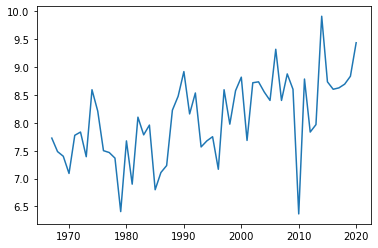

In [81]:
plt.plot(tid[id[2]:id[-1]], temp[id[2]:id[-1]])
plt.show()


Man kunne også skrevet som under, men i blant har man behov for å lagre indeksen til alle inndelingene, for eksempel hvis man vil plotte alle tidsperiodene i samme figur. Dette gir mening hvis man f.eks. vil plotte standardavviket til hver periode, trenglinjer til hver periode, eller andre variabler basert på tidsserien man har.

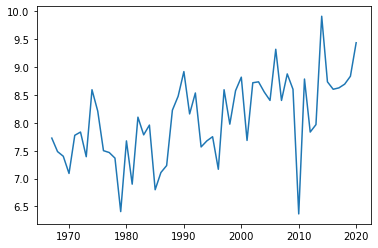

In [83]:
plt.plot(tid[2*int(np.round(len(tid)/3)):], temp[2*int(np.round(len(tid)/3)):])
plt.show()

#### Oppgave 9. 
Del tidsserien inn i fire like lange bolker og plot de to midterste bolkene i samme figur.